## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [246]:
DataSet=pd.read_csv('arruela_.csv')

In [247]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [248]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [249]:
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,36,50,80,1,0
4,71,72,50,1,0


In [250]:
DataSet.describe()

,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,59.777778,63.697318,54.747126,0.375479,0.624521
std,17.293075,30.629366,35.548413,0.485177,0.485177
min,3.000000,6.000000,17.000000,0.000000,0.000000
25%,50.000000,46.000000,38.000000,0.000000,0.000000
50%,59.000000,56.000000,44.000000,0.000000,1.000000
75%,69.000000,68.000000,54.000000,1.000000,1.000000
max,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [251]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

In [252]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

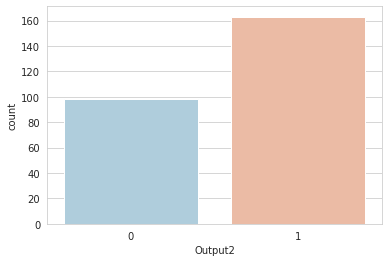

In [253]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

In [254]:
DataSet.Output2.value_counts()

1    163
0     98
Name: Output2, dtype: int64

In [255]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = DataSet[DataSet.Output2==1]
df_minority = DataSet[DataSet.Output2==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=98,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
DataSet = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
DataSet.Output2.value_counts()

0    98
1    98
Name: Output2, dtype: int64

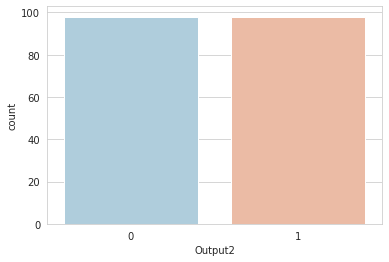

In [256]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

/home/vitor-apolinario/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


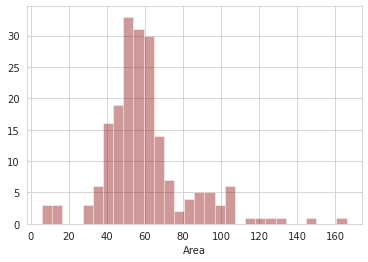

In [257]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

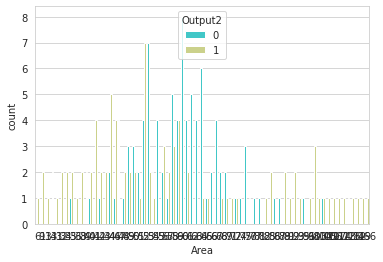

In [258]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

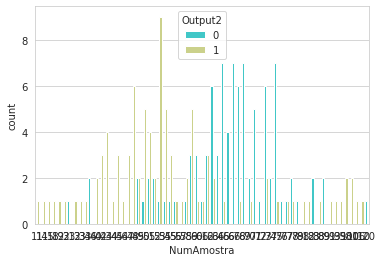

In [259]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

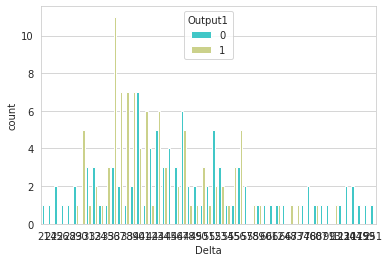

In [260]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [261]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

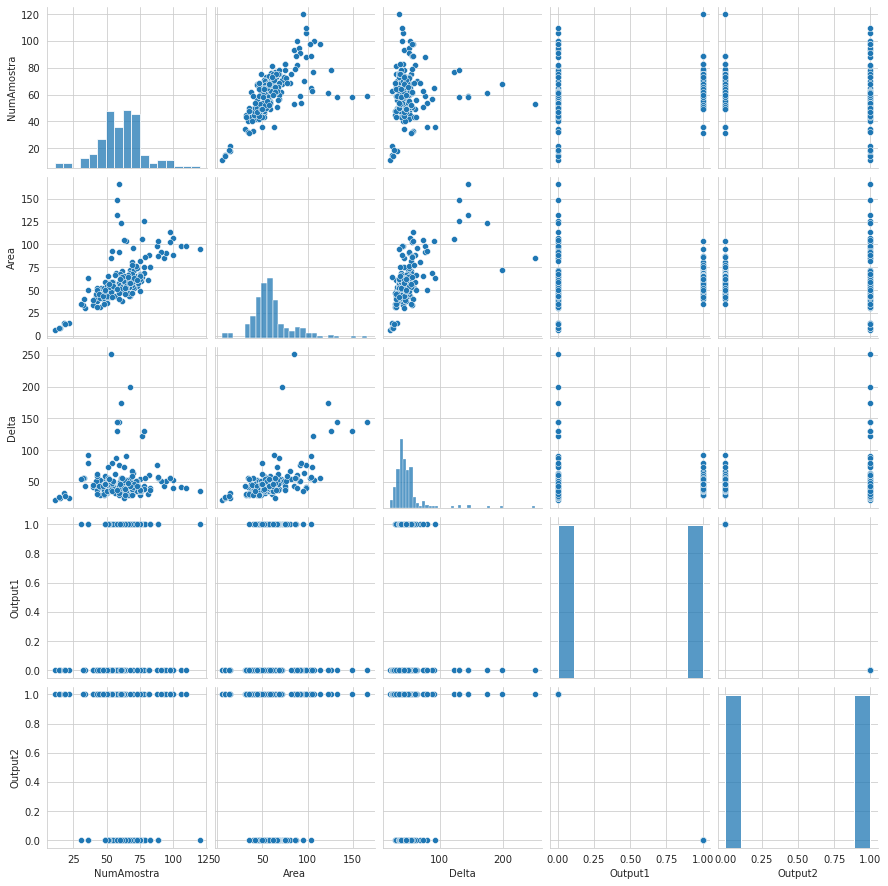

In [262]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

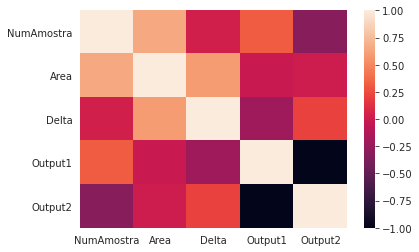

In [263]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [264]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])


In [265]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Output1,Output2
0,1.915164,1.099116,-0.203376,-1.0,1.0
1,2.697691,1.674531,-0.276651,-1.0,1.0
2,-0.372222,-0.051715,-0.093463,-1.0,1.0
3,-3.020775,-2.397639,-1.046041,-1.0,1.0
4,2.035553,1.364692,0.089725,-1.0,1.0


### Conjunto de dados para o treinamento

In [266]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

print(y_train.value_counts())
print(y_test.value_counts())

Output1  Output2
0        1          73
1        0          64
dtype: int64
Output1  Output2
1        0          34
0        1          25
dtype: int64


## Criando o Modelo de MPL

In [268]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 32
N_output = 2
learnrate = 0.1

## Inicialização dos pesos da MPL (Aleatório)

In [269]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.08521046  0.03838005  0.03640233  0.01826698 -0.05646857  0.02018617
  -0.00643243  0.21300397 -0.15458428  0.13591009  0.11685409  0.02971902
   0.08216157  0.10260388 -0.08819038  0.13632147 -0.02270748 -0.00140038
  -0.1277302  -0.00586208 -0.17891765 -0.08639221 -0.06085895 -0.09923579
   0.08229243  0.01806946 -0.01873669  0.02264959 -0.12449719 -0.01510585
   0.00302604  0.05874467]
 [ 0.03239061 -0.04183966  0.13429054 -0.03908678 -0.06410372 -0.14519122
  -0.11476791 -0.02210131 -0.07627431 -0.03319585  0.04093452 -0.14067668
  -0.02901093 -0.15457945 -0.07077769 -0.09719211  0.02322297  0.01361279
  -0.0060733  -0.09772834  0.05682143  0.11413074 -0.19993905  0.09708149
  -0.1071319   0.10636234  0.15711094 -0.03133507 -0.06444567 -0.01593223
  -0.07922623 -0.05876364]
 [ 0.01593085  0.02364647 -0.14863984 -0.04871571 -0.05857596 -0.02788908
  -0.02221735  0.16276243 -0.24385088  0.10774791 -0.05976996 -0.03195599
   0.07032988 -0.05789757 -0.02337

In [270]:
## Validação do modelo

In [271]:
def validate():    
    global y_true
    global y_pred
    
    y_true=[]
    y_pred=[]

    # Calcule a precisão dos dados de teste
    n_records, n_features = X_test.shape
    predictions=0

    for xi, yi in zip(X_test.values, y_test.values):

    # Forward Pass
            #Camada oculta
            #Calcule a combinação linear de entradas e pesos sinápticos
            hidden_layer_input = np.dot(xi, weights_input_hidden)
            #Aplicado a função de ativação
            hidden_layer_output = sigmoid(hidden_layer_input)

            #Camada de Saída
            #Calcule a combinação linear de entradas e pesos sinápticos
            output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

            #Aplicado a função de ativação 
            output = sigmoid(output_layer_in)

    #-------------------------------------------    

    #Cálculo do Erro da Predição
            ## TODO: Cálculo do Erro        
            if (output[0]>output[1]):
                if (yi[0]>yi[1]):
                    predictions+=1

            if (output[1]>=output[0]):
                if (yi[1]>yi[0]):
                    predictions+=1

            y_true.append(yi[1])
            y_pred.append(0 if output[0] > output[1] else 1)

    return predictions/n_records

## Algoritmo Backpropagation

In [272]:
epochs = 50000
last_loss=None
EvolucaoError=[]
IndiceError=[]
accuracies=[]

y_true = []
y_pred = []

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print(e," - Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print(e," - Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)
    
    accuracies.append(validate())

0  - Erro quadrático no treinamento:  0.3512736430602705
2500  - Erro quadrático no treinamento:  0.061515313983840546
5000  - Erro quadrático no treinamento:  0.03259527266058977
7500  - Erro quadrático no treinamento:  0.02332202701673352
10000  - Erro quadrático no treinamento:  0.018417982246843868
12500  - Erro quadrático no treinamento:  0.01620553823283951
15000  - Erro quadrático no treinamento:  0.014993477218442328
17500  - Erro quadrático no treinamento:  0.015704213603288414  Atenção: O erro está aumentando
20000  - Erro quadrático no treinamento:  0.01923168608917957  Atenção: O erro está aumentando
22500  - Erro quadrático no treinamento:  0.025215802057552424  Atenção: O erro está aumentando
25000  - Erro quadrático no treinamento:  0.02966615637188106  Atenção: O erro está aumentando
27500  - Erro quadrático no treinamento:  0.030246608550623996  Atenção: O erro está aumentando
30000  - Erro quadrático no treinamento:  0.02890559670047519
32500  - Erro quadrático no tre

## Gráfico da Evolução do Erro

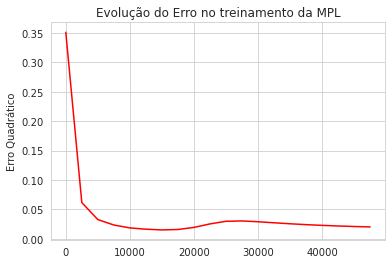

In [273]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

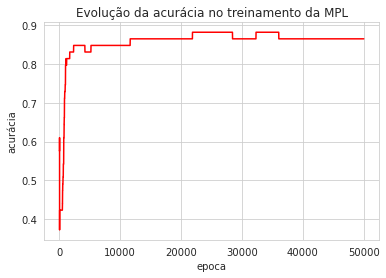

In [274]:
plt.plot([e+1 for e in range(epochs)], accuracies, 'r') # 'r' is the color red
plt.xlabel('epoca')
plt.ylabel('acurácia')
plt.title('Evolução da acurácia no treinamento da MPL')
plt.show()

## Resultados do modelo

In [275]:
print(classification_report(y_true, y_pred, target_names=['uma arroela', 'duas arroelas']))

               precision    recall  f1-score   support

  uma arroela       0.91      0.85      0.88        34
duas arroelas       0.81      0.88      0.85        25

     accuracy                           0.86        59
    macro avg       0.86      0.87      0.86        59
 weighted avg       0.87      0.86      0.86        59

